## Fake News Detector(Basic) using Deep Learning Project


### In this project, I use Deep Learning technique i.e., Long Short Term Memory(LSTM)

#### Problem Statement : In the last few years, due to the widespread usage of online social networks, fake news spreading  at an alarming rate for various commercial and political purposes which is a matter of concern as it has numerous psychological effects on offline society.

#### Dataset Used: ISOT Fake News Dataset --> 2 csv files --> real, fake -->21417 true news, 23481 fake news --> article title, body, subject, date

#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

#### loading datasets

In [2]:
df_fake=pd.read_csv(r'C:\Users\Dell\Desktop\News _dataset\Fake.csv')
print(df_fake.head(5))

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [3]:
df_true=pd.read_csv(r'C:\Users\Dell\Desktop\News _dataset\True.csv')
print(df_true.head(5))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


#### As we only need title and text, so we will drop extra fetures i.e., subject and date.

#### Data processing

In [4]:
df_fake=df_fake.drop(['subject','date'], axis=1)
df_fake['label']='FAKE'
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [5]:
df_true=df_true.drop(['subject','date'], axis=1)
df_true['label']='TRUE'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


#### Next, we have to merged the both datasets 

In [6]:
#merging the datasets
df=pd.concat([df_true,df_fake], ignore_index=True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


#### As we observe that, there is a defined sequence of true and fake labels. So, we need to shuffle the dataset to introduce a randomness in the dataset.

In [7]:
#shuffling the datset
df=df.reindex(np.random.permutation(df.index))
df.head()

,title,text,label
30886,WATCH: ARROGANT Sexual Predator and Sometimes ...,The not so funny comedian Louis C.K. appeared ...,FAKE
15566,"Britain's PM May, husband have no direct offsh...",LONDON (Reuters) - Neither the British Prime M...,TRUE
12179,Mexico's Senate picks new electoral prosecutor...,MEXICO CITY (Reuters) - Mexico s Senate on Fri...,TRUE
25758,Trump Has Been BRIBING Government Officials F...,While the amount of Trump s ahem charitable gi...,FAKE
22305,Trump Supporter Pleads Guilty To Tampering Wi...,"At the close of the election, upon finding out...",FAKE


#### We have to clean the True News Text as it affects the model building process as it's not an important feature for building a fake news detector (Use regular expressions for clean the text)

In [8]:
#function for extracting desired text using regex
def extract_text(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_text)
#checking dataframe containing only True News
df[df.label=="TRUE"]
    

,title,text,label,text_processed
15566,"Britain's PM May, husband have no direct offsh...",LONDON (Reuters) - Neither the British Prime M...,TRUE,Neither the British Prime Minister Theresa May...
12179,Mexico's Senate picks new electoral prosecutor...,MEXICO CITY (Reuters) - Mexico s Senate on Fri...,TRUE,Mexico s Senate on Friday named the country s ...
20656,China's tighter drone rules send new pilots fl...,BEIJING (Reuters) - A buzz fills the sky above...,TRUE,A buzz fills the sky above a flight base in no...
17405,Final assault starts on Syria's Raqqa as some ...,"AIN ISSA, Syria/BEIRUT (Reuters) - U.S.-backed...",TRUE,U.S.-backed militias launched their final as...
1835,New Senate Obamacare repeal bill due Monday: s...,WASHINGTON (Reuters) - A new Republican bill t...,TRUE,A new Republican bill to replace Obamacare wil...
...,...,...,...,...
20617,U.N. rights chief says EU deal on Libya migran...,GENEVA (Reuters) - A European and African deal...,TRUE,A European and African deal to stem the flow o...
15010,"At least one person dead, 50 wounded in Iraq a...","ERBIL, Iraq (Reuters) - At least one person di...",TRUE,At least one person died and 50 were wounded a...
16759,Tanzania president names tax expert as central...,DAR ES SALAAM (Reuters) - Tanzania s new centr...,TRUE,Tanzania s new central bank governor will be t...
9439,Looming U.S. abortion ruling could be 'dangero...,NEW YORK (Thomson Reuters Foundation) - As a S...,TRUE,NEW YORK (Thomson Reuters Foundation) - As a S...


#### Data preparation & cleaning

#### Firstly we will convert the target variable label into binary variable 0 for True news and 1 for Fake news.

In [9]:
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()

,title,text,label,text_processed
30886,WATCH: ARROGANT Sexual Predator and Sometimes ...,The not so funny comedian Louis C.K. appeared ...,1,The not so funny comedian Louis C.K. appeared ...
15566,"Britain's PM May, husband have no direct offsh...",LONDON (Reuters) - Neither the British Prime M...,0,Neither the British Prime Minister Theresa May...
12179,Mexico's Senate picks new electoral prosecutor...,MEXICO CITY (Reuters) - Mexico s Senate on Fri...,0,Mexico s Senate on Friday named the country s ...
25758,Trump Has Been BRIBING Government Officials F...,While the amount of Trump s ahem charitable gi...,1,While the amount of Trump s ahem charitable gi...
22305,Trump Supporter Pleads Guilty To Tampering Wi...,"At the close of the election, upon finding out...",1,"At the close of the election, upon finding out..."


#### Further, we have to drop unnecessary features i.e., title, text, and text_processed features from the dataset as we have to use only the final combined news column for building the LSTM model.

In [10]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']
# now we can delete extra columns 
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)
df.head()

,label,final_news
30886,1,WATCH: ARROGANT Sexual Predator and Sometimes ...
15566,0,"Britain's PM May, husband have no direct offsh..."
12179,0,Mexico's Senate picks new electoral prosecutor...
25758,1,Trump Has Been BRIBING Government Officials F...
22305,1,Trump Supporter Pleads Guilty To Tampering Wi...


####  Next, lowercase the data, Further, we will remove the stopwords and all non-alphabetic characters from the dataset.

In [11]:
import nltk
from nltk.corpus import stopwords
# Download the stopwords if you haven't already
# nltk.download('stopwords')
# creating list of possible stopwords from nltk library
stop = stopwords.words('english')
def cleanText(txt):
    # lowercasing
    txt = txt.lower()
    # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
    # removing non-alphabetic characters
    txt = re.sub('[^a-z\s]', ' ', txt)  # Allow spaces to retain word separation
    return txt
# applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
# Display the head of the DataFrame
print(df.head())


       label                                         final_news
30886      1  watch  arrogant sexual predator sometimes  com...
15566      0  britain s pm may  husband direct offshore inve...
12179      0  mexico s senate picks new electoral prosecutor...
25758      1  trump bribing government officials decades  de...
22305      1  trump supporter pleads guilty tampering electi...


#### Building Word Embeddings (GLOVE) --> In this case study, we will use Global vectors for word representation (GLOVE) word embeddings. It is an unsupervised learning algorithm for obtaining vector representations for words.

In [12]:
# Define the path to the GloVe file
path = 'E:\GLOVE'
EMBEDDING_FILE = f'{path}/glove.6B.50d.txt'
# Configuration settings
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10
# Assuming df is a predefined DataFrame containing your data
# Creating feature and target variables
X = df.drop(['label'], axis=1)
y = df['label'].values
# Check if the GloVe file exists
import os
if os.path.exists(EMBEDDING_FILE):
    print("GloVe file exists!")
else:
    print("GloVe file not found. Please check the path.")
# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector 


GloVe file exists!


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load GloVe embeddings
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE, 'r', encoding='utf-8') as f:
    # The file is a space-separated text file in the format: word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

print(f'Found {len(word2vec)} word vectors.')

# Convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

# Pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Loading word vectors...
Found 400000 word vectors.
Shape of data tensor: (44898, 100)


In [14]:
# Prepare embedding matrix
num_words = min(MAX_VOCAB_SIZE, len(tokenizer.word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if i >= MAX_VOCAB_SIZE:
        continue
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, Dense
# Load pre-trained word embeddings into an Embedding layer
embedding_layer = Embedding(
    num_words,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable=False
)
# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)
model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 30)             │           7,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 30)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,951 (3.85 MB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [16]:
from sklearn.model_selection import train_test_split
# train Test split in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 100s 82ms/step - accuracy: 0.8581 - loss: 0.3325 - val_accuracy: 0.9420 - val_loss: 0.1548
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 137s 77ms/step - accuracy: 0.9522 - loss: 0.1276 - val_accuracy: 0.9589 - val_loss: 0.1105
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 85s 76ms/step - accuracy: 0.9656 - loss: 0.0943 - val_accuracy: 0.9683 - val_loss: 0.0900
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 67s 59ms/step - accuracy: 0.9721 - loss: 0.0763 - val_accuracy: 0.9717 - val_loss: 0.0813
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9776 - loss: 0.0652 - val_accuracy: 0.9738 - val_loss: 0.0693
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9813 - loss: 0.0565 - val_accuracy: 0.9780 - val_loss: 0.0640
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9838 - loss: 0.0474 - val_accuracy: 0.9807 - val_loss: 0.0575
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 33s 29ms/step - accuracy: 0.9870

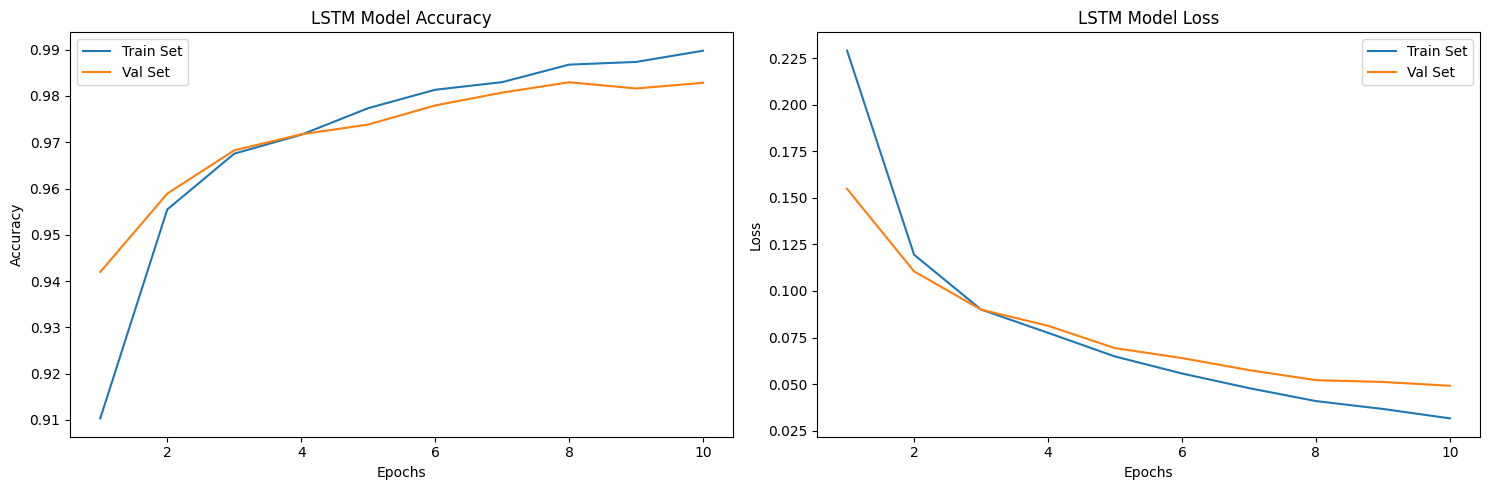

In [17]:
import matplotlib.pyplot as plt
# Train the model
r = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')
# Plot training & validation accuracy and loss values
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, EPOCHS + 1)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')
plt.tight_layout()
plt.show()

In [18]:
print('Accuracy of the model on training data is : ', model.evaluate(X_train,y_train)[1]*100)
print('Accuracy of the model on testing data is : ', model.evaluate(X_test,y_test)[1]*100)


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9928 - loss: 0.0247
Accuracy of the model on training data is :  99.3151068687439
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9836 - loss: 0.0513
Accuracy of the model on testing data is :  98.28507900238037


In [25]:
pred=model.predict(X_test)
pred[:5]

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[9.9971259e-01],
       [3.0614386e-04],
       [9.9997491e-01],
       [9.9999583e-01],
       [9.9989218e-01]], dtype=float32)

### Confusion matrix

Text(0.5, 14.722222222222216, 'Predicted')

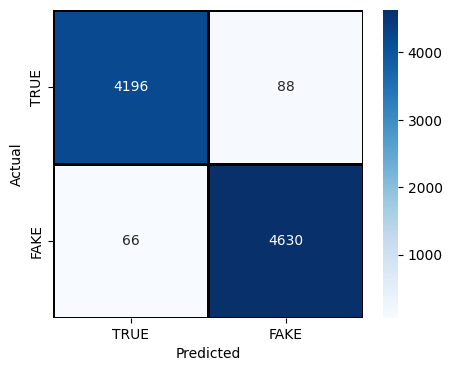

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,pred.round())
cm=pd.DataFrame(cm, index=['TRUE','FAKE'],columns=['TRUE','FAKE'])
plt.figure(figsize=(5,4))
sns.heatmap(cm,cmap='Blues',linecolor='black',linewidth=1,annot=True, fmt='',xticklabels=['TRUE','FAKE'],yticklabels=['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

### classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4284
           1       0.98      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [28]:
y_pred=model.predict(X_test).ravel()

281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


### ROC AUC PLOT

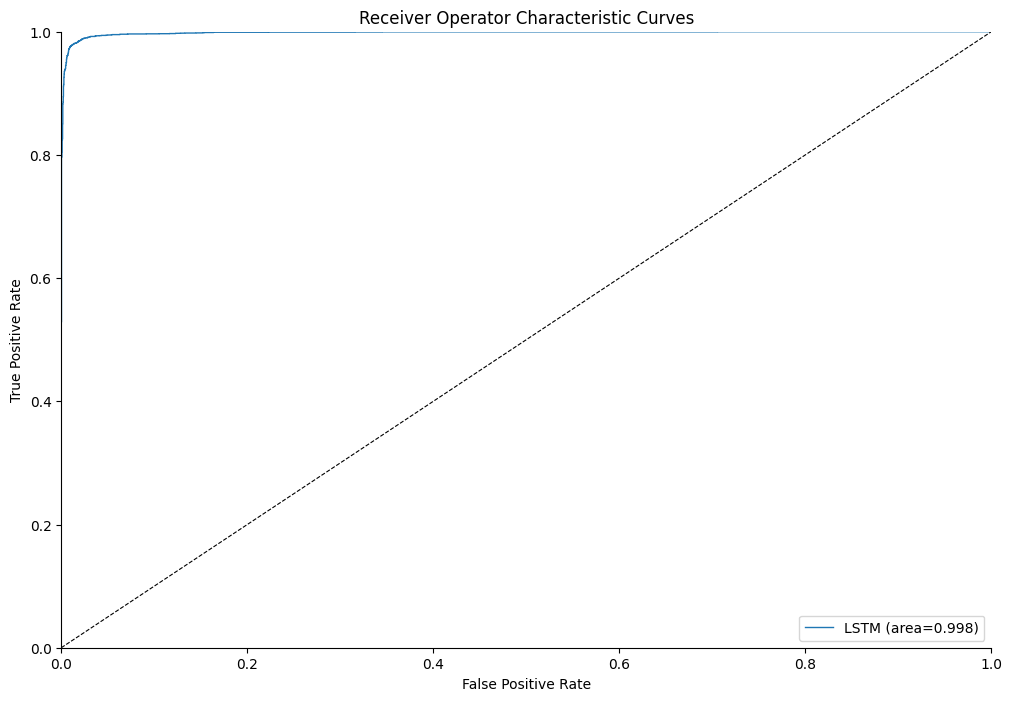

In [23]:
def roc_auc_plot(y_true,y_proba,label=' ',l='-',lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr,tpr,_=roc_curve(y_true,y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    ax.plot(fpr,tpr,linestyle=l,linewidth=lw, label="%s (area=%.3f)"%(label,roc_auc_score(y_true,y_proba)))
f, ax=plt.subplots(figsize=(12,8))
roc_auc_plot(y_test,y_pred,label='LSTM',l='-',lw=1.0)
ax.plot([0,1],[0,1],color='k',linewidth=0.8,linestyle='--')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()
plt.show()

    

In [44]:
testSent1=["LONDON (Reuters) - Neither the British Prime M...",
          "Alience are landed on earth to live with us."]

In [45]:
def cleanText(txt):
    txt=txt.lower()
    txt=' '.join([word for word in txt.split() if word not in(stop)])
    txt=re.sub('[^a-z]',' ',txt)
    return txt

In [46]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
def predict_text(first_text):
    # Tokenize the input text using the global 'tokenizer' object (assuming it's defined globally)
    test_sequences = tokenizer.texts_to_sequences(first_text)
    # Pad sequences to ensure consistent length as required by the model
    test_sequences_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
    # Create a DataFrame to store results
    df_test = pd.DataFrame(first_text, columns=['test_sent'])
    # Predict using the global 'model' object (assuming it's defined globally)
    predictions = model.predict(test_sequences_padded)
    # Apply threshold (e.g., 0.5 for binary classification) and convert to labels
    df_test['prediction'] = ['Fake' if pred >= 0.1 else 'Real' for pred in predictions]
    # Optionally, clean the text in the DataFrame (if 'cleanText' function is defined)
    # df_test['test_sent'] = df_test['test_sent'].apply(cleanText)
    return df_test


In [47]:
df_testsent1=predict_text(testSent1)
df_testsent1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,test_sent,prediction
0,LONDON (Reuters) - Neither the British Prime M...,Real
1,Alience are landed on earth to live with us.,Fake
